In [3]:
import face_recognition
import cv2
import os
import math
import json
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from PIL import Image, ImageDraw
from torchvision import transforms
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Print the location of each facial feature in this image
facial_features = [
    'chin',
    'left_eyebrow',
    'right_eyebrow',
    'nose_bridge',
    'nose_tip',
    'left_eye',
    'right_eye',
    'top_lip',
    'bottom_lip'
    ]

In [37]:
root_path = Path('/nfs/students/summer-term-2018/project_2/data/YT_CAR_DRIVING/')

### Load from json

In [36]:
with open(root_path / 'landmarks.json') as f:
    landmarks = json.load(f)
landmarks_array = np.array(list(landmarks.values()))
landmarks_X = landmarks_array[:,::2]
landmarks_Y = landmarks_array[:,1::2]
N, D = landmarks_array.shape

### Load from npy

In [38]:
landmarks_array = np.load(root_path/ 'landmarks.npy')
landmarks_array = landmarks_array.reshape((-1,144))
landmarks_X = landmarks_array[:,::2]
landmarks_Y = landmarks_array[:,1::2]
N, D = landmarks_array.shape

# Evaluation of landmarks

<Figure size 720x720 with 0 Axes>

(0.0, 1.0, -1.0, 0.0)

(0.0, 1.0, -1.0, 0.0)

Text(0.5,1,'2d histogram of facial landmarks')

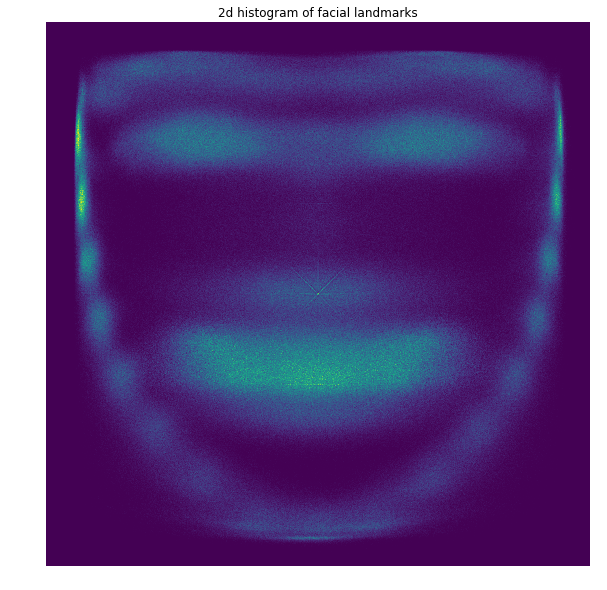

In [10]:
plt.figure(figsize=(10,10))
n, x_bins, y_bins, patches = plt.hist2d(landmarks_X.reshape(-1),  # x coordinates
                                        -landmarks_Y.reshape(-1), # y coordinates inverted
                                        bins=1000, range=[[0,1],[-1,0]])
plt.axis('off')
plt.axis('equal')
plt.title('2d histogram of facial landmarks')
plt.show()

<Figure size 720x720 with 0 Axes>

Text(0.5,1,'Histogram - x coordinate left eye landmark')

Text(0.5,1,'Histogram - y coordinate left eye landmark')

<Figure size 720x720 with 0 Axes>

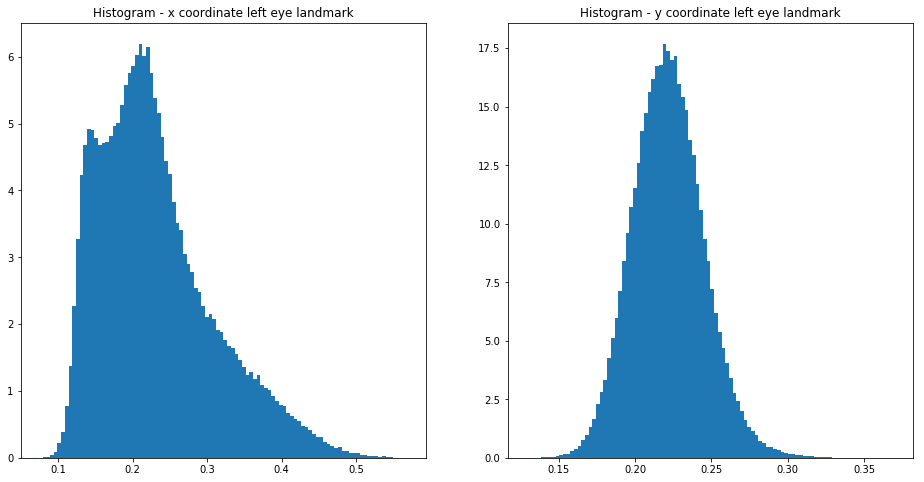

In [5]:
N_bins = 100
dim = 72

# Fit distribution
x = np.linspace(0,1,num=N_bins)
mean, std = scipy.stats.norm.fit(landmarks_array[:,dim])
#pdf_fitted = scipy.stats.norm.pdf(x, mean, std)# * x.shape

plt.figure(figsize=(10,10))

#plt.plot(x, pdf_fitted, label='Norm')
fig, ax = plt.subplots(1,2, figsize=(16,8))
n, bins, patches = ax[0].hist(landmarks_array[:,dim], bins=N_bins, density=True)
ax[0].set_title('Histogram - x coordinate left eye landmark')
n, bins, patches = ax[1].hist(landmarks_array[:,dim+1], bins=N_bins, density=True)
ax[1].set_title('Histogram - y coordinate left eye landmark')

plt.show()

# Generation of landmarks

In [11]:
import time
start = time.time()
mean = np.mean(landmarks_array[:2], axis=0)
cov = np.cov(landmarks_array[:2], rowvar=0)
end = time.time()
end - start

0.0032415390014648438

In [12]:
image_path = Path('/tmp/gray.jpg')
image = Image.open(image_path)

for i in range(100):
    pass
    # Generate landmarks in all formats
    random_landmarks = np.random.multivariate_normal(mean, cov)
    random_landmarks_unscaled = (random_landmarks) * image.size[0]
    random_landmarks_list = list(zip(random_landmarks_unscaled[::2], random_landmarks_unscaled[1::2]))
    random_landmarks_dict = dict_landmarks(random_landmarks_list)
    # Drawings
    random_img = draw_landmarks(image, random_landmarks_dict)
    random_img.save('/tmp/random_faces/' + str(i) + '.jpg')

# Mean face

In [ ]:
mean_landmarks_unscaled = (mean) * image.size[0]
mean_landmarks_list = list(zip(mean_landmarks_unscaled[::2], mean_landmarks_unscaled[1::2]))
mean_landmarks_dict = dict_landmarks(mean_landmarks_list)
draw_landmarks(image, mean_landmarks_dict)

# 5 Landmarks

In [62]:
# Eye left
lm0_x = np.mean(landmarks_X[:,36:42], axis=1)
lm0_y = np.mean(landmarks_Y[:,36:42], axis=1)
# Eye right
lm1_x = np.mean(landmarks_X[:,42:48], axis=1)
lm1_y = np.mean(landmarks_Y[:,42:48], axis=1)
# Nose
lm2_x = np.mean(landmarks_X[:,31:36], axis=1)
lm2_y = np.mean(landmarks_Y[:,31:36], axis=1)
# Mouth left
lm3_x = landmarks_X[:,48]
lm3_y = landmarks_Y[:,48]
# Mouth right
lm4_x = landmarks_X[:,60]
lm4_y = landmarks_Y[:,60]

landmarks_5 = np.vstack([lm0_x, lm0_y, lm1_x, lm1_y, lm2_x, lm2_y, lm3_x, lm3_y, lm4_x, lm4_y]).T
landmarks_5_mean = np.mean(landmarks_5, axis=0)

<Figure size 720x720 with 0 Axes>

(0.0, 1.0, -1.0, 0.0)

(0.0, 1.0, -1.0, 0.0)

Text(0.5,1,'2d histogram of facial landmarks + 5 landmarks')

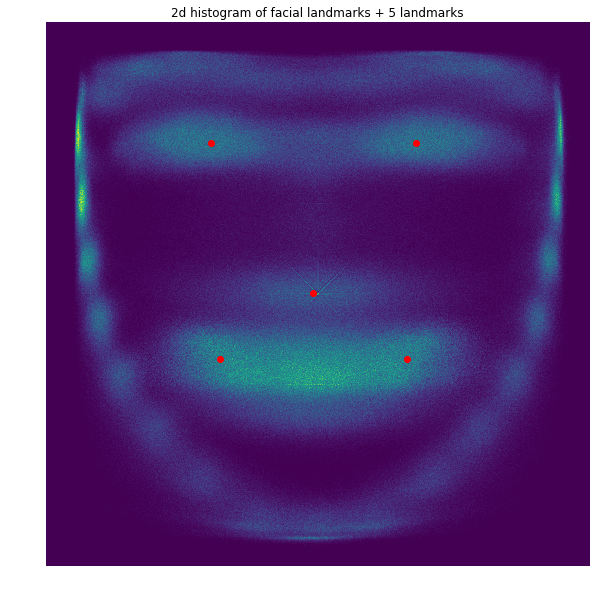

In [24]:
plt.figure(figsize=(10,10))
n, x_bins, y_bins, patches = plt.hist2d(landmarks_X.reshape(-1),  # x coordinates
                                        -landmarks_Y.reshape(-1), # y coordinates inverted
                                        bins=1000, range=[[0,1],[-1,0]])
plt.scatter(landmarks_5_mean[::2],
            -landmarks_5_mean[1::2], c='r')
plt.axis('off')
plt.axis('equal')
plt.title('2d histogram of facial landmarks + 5 landmarks')
plt.show()

In [27]:
mean = np.mean(landmarks_5, axis=0)
cov = np.cov(landmarks_5, rowvar=0)
np.save(root_path / 'landmarks5_mean.npy', mean)
np.save(root_path / 'landmarks5_cov.npy', cov)

landmarks_5_r = landmarks_5.reshape((-1,10))
np.save(root_path / 'landmarks5.npy', landmarks_5_r)

array([[0.26494979, 0.24169489, 0.60670145, 0.24169489, 0.39263986,
        0.438379  , 0.27983406, 0.63115076, 0.5322221 , 0.64865919],
       [0.18560501, 0.17128202, 0.58429327, 0.17128202, 0.331997  ,
        0.50387505, 0.2163081 , 0.64585205, 0.54881396, 0.66163514],
       [0.34850367, 0.22881278, 0.70639217, 0.22881278, 0.54671936,
        0.50095557, 0.41980068, 0.64068379, 0.66364825, 0.64111462],
       [0.21088657, 0.20974112, 0.58661814, 0.20974112, 0.36344716,
        0.50182956, 0.24461138, 0.63420951, 0.57553316, 0.6225934 ],
       [0.30185965, 0.22967815, 0.65367078, 0.22967815, 0.4485311 ,
        0.52283358, 0.31232605, 0.62596616, 0.61707208, 0.62366372]])

# 10 Landmarks

In [15]:
# Eye left
lm0_x = np.mean(landmarks_X[:,36:42], axis=1)
lm0_y = np.mean(landmarks_Y[:,36:42], axis=1)
# Eye right
lm1_x = np.mean(landmarks_X[:,42:48], axis=1)
lm1_y = np.mean(landmarks_Y[:,42:48], axis=1)
# Nose
lm2_x = np.mean(landmarks_X[:,31:36], axis=1)
lm2_y = np.mean(landmarks_Y[:,31:36], axis=1)
# Mouth left
lm3_x = landmarks_X[:,48]
lm3_y = landmarks_Y[:,48]
# Mouth right
lm4_x = landmarks_X[:,60]
lm4_y = landmarks_Y[:,60]
# Mouth top
lm5_x = landmarks_X[:,51]
lm5_y = landmarks_Y[:,51]
# Mouth bottom
lm6_x = landmarks_X[:,63]
lm6_y = landmarks_Y[:,63]
# Chin
lm7_x = landmarks_X[:,8]
lm7_y = landmarks_Y[:,8]
# Face left
lm8_x = landmarks_X[:,2]
lm8_y = landmarks_Y[:,2]
# Face right
lm9_x = landmarks_X[:,14]
lm9_y = landmarks_Y[:,14]
lm9_y.shape
landmarks_10 = np.vstack([lm0_x, lm0_y, lm1_x, lm1_y, lm2_x, lm2_y, lm3_x, lm3_y, lm4_x, lm4_y, lm5_x, lm5_y, lm6_x, lm6_y, lm7_x, lm7_y, lm8_x, lm8_y, lm9_x, lm9_y]).T
print(landmarks_10.shape)
landmarks_10_mean = np.mean(landmarks_10, axis=0)
print(landmarks_10_mean.shape)

(194701,)

(194701, 20)
(20,)


<Figure size 720x720 with 0 Axes>

(0.0, 1.0, -1.0, 0.0)

(0.0, 1.0, -1.0, 0.0)

Text(0.5,1,'2d histogram of facial landmarks + 10 landmarks')

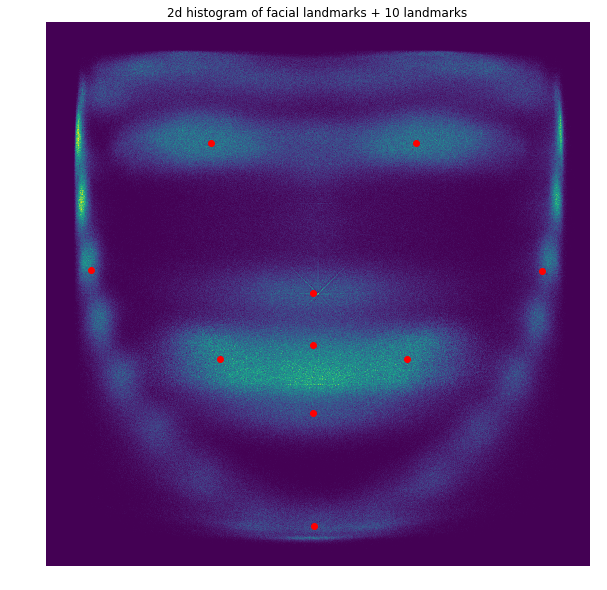

In [46]:
plt.figure(figsize=(10,10))
n, x_bins, y_bins, patches = plt.hist2d(landmarks_X.reshape(-1),  # x coordinates
                                        -landmarks_Y.reshape(-1), # y coordinates inverted
                                        bins=1000, range=[[0,1],[-1,0]])
plt.scatter(landmarks_10_mean[::2],
            -landmarks_10_mean[1::2], c='r')
plt.axis('off')
plt.axis('equal')
plt.title('2d histogram of facial landmarks + 10 landmarks')
plt.show()

In [59]:
mean = np.mean(landmarks_10, axis=0)
cov = np.cov(landmarks_10, rowvar=0)
np.save(root_path / 'landmarks10_mean.npy', mean)
np.save(root_path / 'landmarks10_cov.npy', cov)

landmarks_10_r = landmarks_10.reshape((-1,20))
np.save(root_path / 'landmarks10.npy', landmarks_10_r)

# Landmarks 28

In [39]:
right_eye_X, right_eye_Y = landmarks_X[:,42:48], landmarks_Y[:,42:48]
left_eye_X, left_eye_Y = landmarks_X[:,36:42], landmarks_Y[:,36:42]

face_contur_X, face_contur_Y = landmarks_X[:,0:17:4], landmarks_Y[:,0:17:4]

nose_X, nose_Y = np.mean(landmarks_X[:,31:36], axis=1)[:,None], np.mean(landmarks_Y[:,31:36], axis=1)[:,None]

mouth_X, mouth_Y = landmarks_X[:,[48,50,52,56,58,60,62,64,68,70]], landmarks_Y[:,[48,50,52,56,58,60,62,64,68,70]]

# Unify X & Y coordinates
landmarks_28_X = np.hstack((right_eye_X, left_eye_X, face_contur_X, nose_X, mouth_X))
landmarks_28_Y = np.hstack((right_eye_Y, left_eye_Y, face_contur_Y, nose_Y, mouth_Y))
landmarks_28 = np.dstack((landmarks_28_X,landmarks_28_Y)).reshape((-1,56))
landmarks_28.shape

landmarks_28_mean = np.mean(landmarks_28, axis=0)
landmarks_28_mean.shape

(5812, 56)

(56,)

<Figure size 720x720 with 0 Axes>

(0.0, 1.0, -1.0, 0.0)

(0.0, 1.0, -1.0, 0.0)

Text(0.5,1,'2d histogram of facial landmarks + 28 landmarks')

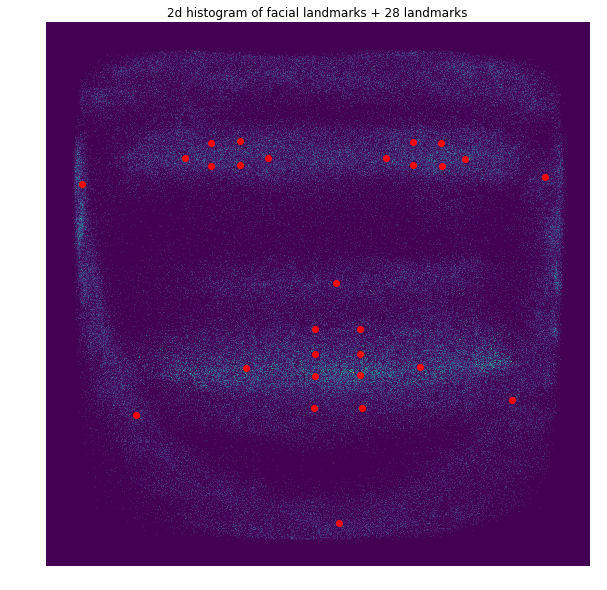

In [40]:
plt.figure(figsize=(10,10))
n, x_bins, y_bins, patches = plt.hist2d(landmarks_X.reshape(-1),  # x coordinates
                                        -landmarks_Y.reshape(-1), # y coordinates inverted
                                        bins=1000, range=[[0,1],[-1,0]])
plt.scatter(landmarks_28_mean[::2],
            -landmarks_28_mean[1::2], c='r')
plt.axis('off')
plt.axis('equal')
plt.title('2d histogram of facial landmarks + 28 landmarks')
plt.show()

In [41]:
mean = np.mean(landmarks_28, axis=0)
cov = np.cov(landmarks_28, rowvar=0)
np.save(root_path / 'landmarks28_mean.npy', mean)
np.save(root_path / 'landmarks28_cov.npy', cov)

landmarks_28_r = landmarks_28.reshape((-1,56))
np.save(root_path / 'landmarks28.npy', landmarks_28_r)